In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Cleaned__dataset_model_build.csv')

In [3]:
data.head()

,ft,km,transmission,ownerNo,oem,model,modelYear,variantName,price,Mileage kmpl,Engine CC,seater,City
0,Petrol,120000,Manual,3,Maruti,Maruti Celerio,2015,VXI,40000.0,23.10,998.0,3.0,Bangalore
1,Petrol,32706,Manual,2,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,81100.0,17.00,1497.0,5.0,Bangalore
2,Petrol,11949,Manual,1,Tata,Tata Tiago,2018,1.2 Revotron XZ,58500.0,23.84,1199.0,5.0,Bangalore
3,Petrol,17794,Manual,1,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,46200.0,19.10,1197.0,5.0,Bangalore
4,Diesel,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,79000.0,23.65,1248.0,5.0,Bangalore


In [4]:
data.tail()

,ft,km,transmission,ownerNo,oem,model,modelYear,variantName,price,Mileage kmpl,Engine CC,seater,City
8359,Petrol,10000,Manual,1,Maruti,Maruti Celerio,2022,ZXI BSVI,51000.0,25.24,998.0,3.0,Kolkata
8360,Petrol,120000,Manual,1,Maruti,Maruti Alto 800,2014,LXI,18000.0,22.74,796.0,3.0,Kolkata
8361,Petrol,50000,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,C 200 CGI Elegance,55000.0,11.74,1796.0,5.0,Kolkata
8362,Petrol,40000,Manual,1,Maruti,Maruti Ritz,2012,ZXi,14000.0,18.50,1197.0,5.0,Kolkata
8363,Diesel,120000,Manual,2,Renault,Renault Duster,2017,110PS Diesel RxZ AWD,50000.0,19.72,1461.0,5.0,Kolkata


In [5]:
data.shape

(8364, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8364 entries, 0 to 8363
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ft            8364 non-null   object 
 1   km            8364 non-null   int64  
 2   transmission  8364 non-null   object 
 3   ownerNo       8364 non-null   int64  
 4   oem           8364 non-null   object 
 5   model         8364 non-null   object 
 6   modelYear     8364 non-null   int64  
 7   variantName   8364 non-null   object 
 8   price         8364 non-null   float64
 9   Mileage kmpl  8364 non-null   float64
 10  Engine CC     8364 non-null   float64
 11  seater        8364 non-null   float64
 12  City          8364 non-null   object 
dtypes: float64(4), int64(3), object(6)
memory usage: 849.6+ KB


In [7]:
year = []
for i,row in data.iterrows():
    a = str(row['modelYear'])
    year.append(a)
# data['modelYear'] = str(data['modelYear'])
data['modelYear'] = pd.DataFrame(year)

In [8]:
data.describe()

,km,ownerNo,price,Mileage kmpl,Engine CC,seater
count,8.364000e+03,8364.000000,8364.000000,8364.000000,8364.000000,8364.000000
mean,5.897538e+04,1.360354,92654.365973,73.191616,1376.028351,4.354017
std,7.407792e+04,0.641904,105897.449295,317.211094,514.542225,1.199304
min,0.000000e+00,0.000000,10000.000000,0.000000,5.000000,2.000000
25%,3.000000e+04,1.000000,40100.000000,17.010000,1197.000000,3.000000
50%,5.367450e+04,1.000000,61500.000000,19.010000,1199.000000,5.000000
75%,8.000000e+04,2.000000,95000.000000,21.790000,1498.000000,5.000000
max,5.500000e+06,5.000000,960000.000000,3982.000000,5000.000000,10.000000


# Normalizing the km column

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
minmax = MinMaxScaler()

In [11]:
data['km'] = minmax.fit_transform(data[['km']])

In [12]:
data.describe()

,km,ownerNo,price,Mileage kmpl,Engine CC,seater
count,8364.000000,8364.000000,8364.000000,8364.000000,8364.000000,8364.000000
mean,0.010723,1.360354,92654.365973,73.191616,1376.028351,4.354017
std,0.013469,0.641904,105897.449295,317.211094,514.542225,1.199304
min,0.000000,0.000000,10000.000000,0.000000,5.000000,2.000000
25%,0.005455,1.000000,40100.000000,17.010000,1197.000000,3.000000
50%,0.009759,1.000000,61500.000000,19.010000,1199.000000,5.000000
75%,0.014545,2.000000,95000.000000,21.790000,1498.000000,5.000000
max,1.000000,5.000000,960000.000000,3982.000000,5000.000000,10.000000


# Boxplots

In [13]:
numerical_data_columns = data.select_dtypes(include=["int64","float64"])
numerical_data_columns = numerical_data_columns.columns.tolist()
print(numerical_data_columns)

['km', 'ownerNo', 'price', 'Mileage kmpl', 'Engine CC', 'seater']


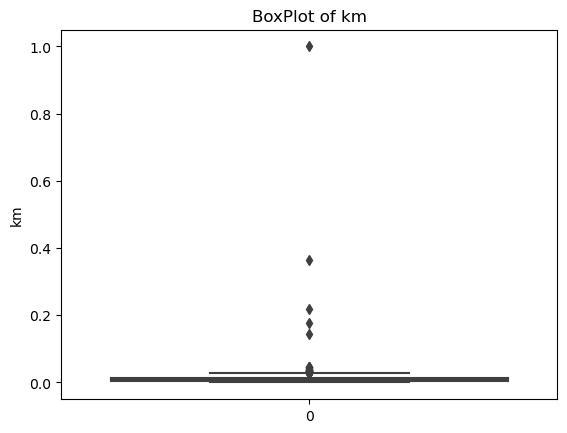

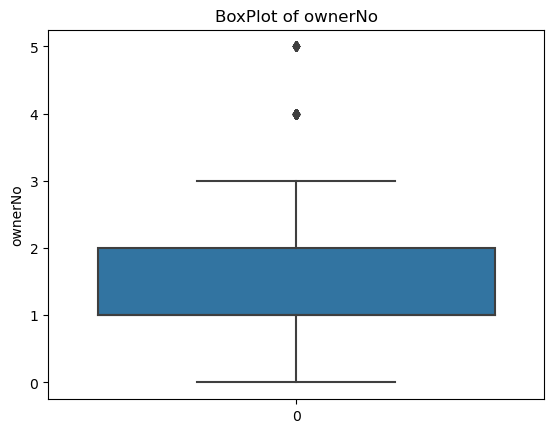

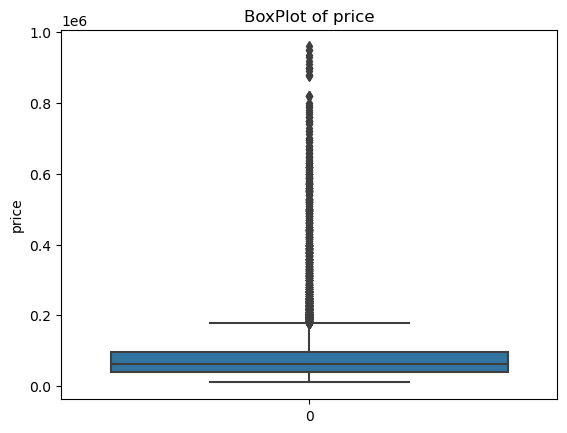

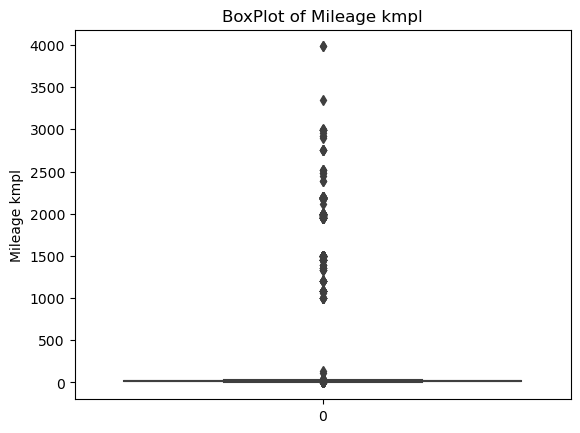

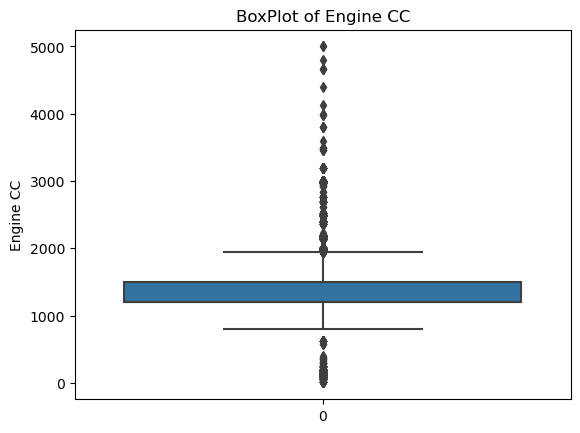

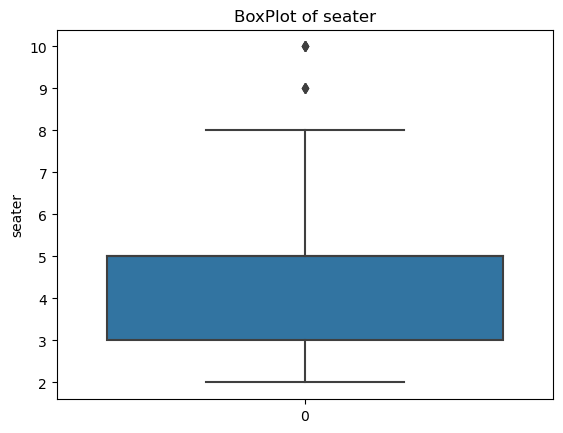

In [14]:
for i in numerical_data_columns:
    sns.boxplot(data[i])
    plt.title(f"BoxPlot of {i}")
    plt.ylabel(i)
    plt.show()

# Outlier Removal -> IQR Method

In [15]:
def outlier(data,columns):
    for column in columns:
        q1 = np.quantile(data[column],0.25)
        q3 = np.quantile(data[column],0.75)
        iqr = q3 - q1
        lower_limit = q1 - (1.5*iqr)
        upper_limit = q3 + (1.5*iqr)
        # outlier_removal = []
        # for i in data[column]:
        #     if i >= lower_limit and i <= upper_limit:
        #         data = data[column].append(i)
        data1 = data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]
    return data1

In [16]:
numerical_data_columns

['km', 'ownerNo', 'price', 'Mileage kmpl', 'Engine CC', 'seater']

In [17]:
data.shape

(8364, 13)

In [18]:
Cleaned_data = outlier(data,columns=numerical_data_columns)

In [19]:
Cleaned_data_df = pd.DataFrame(Cleaned_data)
Cleaned_data_df.head()

,ft,km,transmission,ownerNo,oem,model,modelYear,variantName,price,Mileage kmpl,Engine CC,seater,City
0,Petrol,0.021818,Manual,3,Maruti,Maruti Celerio,2015,VXI,40000.0,23.10,998.0,3.0,Bangalore
1,Petrol,0.005947,Manual,2,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,81100.0,17.00,1497.0,5.0,Bangalore
2,Petrol,0.002173,Manual,1,Tata,Tata Tiago,2018,1.2 Revotron XZ,58500.0,23.84,1199.0,5.0,Bangalore
3,Petrol,0.003235,Manual,1,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,46200.0,19.10,1197.0,5.0,Bangalore
4,Diesel,0.010909,Manual,1,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,79000.0,23.65,1248.0,5.0,Bangalore


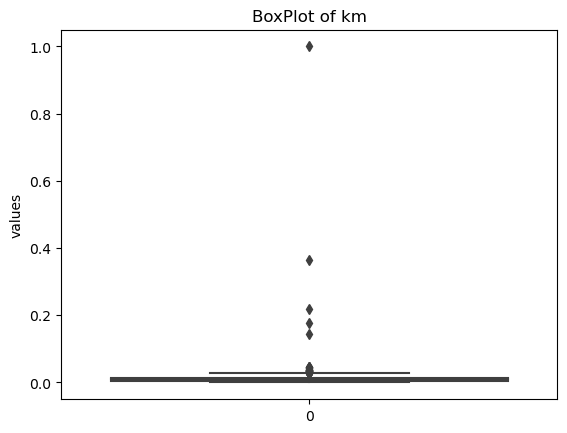

-------------------------------------------------------------------------------


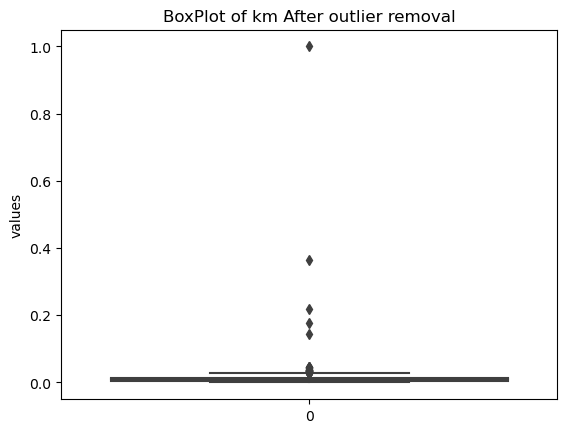

In [20]:
sns.boxplot(data['km'])
plt.title(f"BoxPlot of km")
plt.ylabel("values")
plt.show()
print("-------------------------------------------------------------------------------")
sns.boxplot(Cleaned_data_df['km'])
plt.title(f"BoxPlot of km After outlier removal")
plt.ylabel("values")
plt.show()

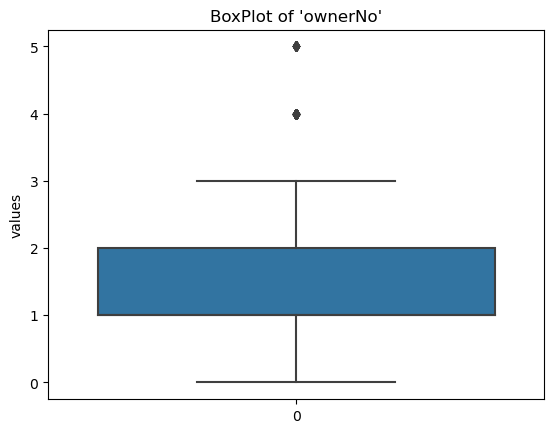

------------------------------------------------------------------------


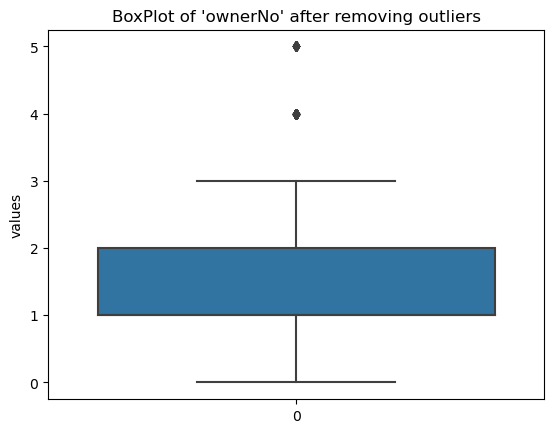

In [21]:
sns.boxplot(data['ownerNo'])
plt.title(f"BoxPlot of 'ownerNo'")
plt.ylabel("values")
plt.show()
print("------------------------------------------------------------------------")
sns.boxplot(Cleaned_data_df['ownerNo'])
plt.title(f"BoxPlot of 'ownerNo' after removing outliers")
plt.ylabel("values")
plt.show()

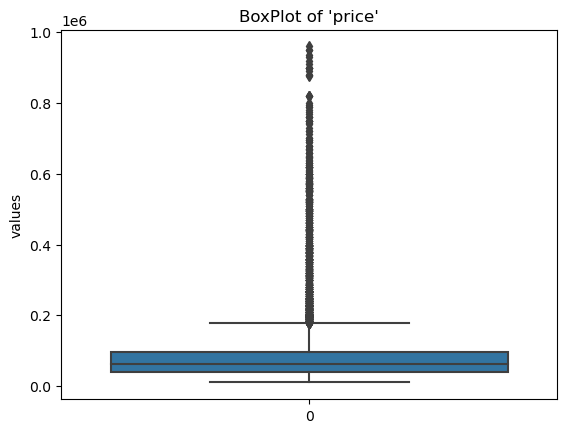

------------------------------------------------------------------------


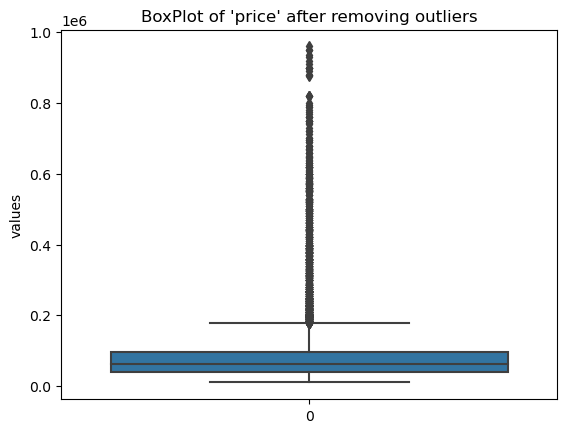

In [22]:
sns.boxplot(data['price'])
plt.title(f"BoxPlot of 'price'")
plt.ylabel("values")
plt.show()
print("------------------------------------------------------------------------")
sns.boxplot(Cleaned_data_df['price'])
plt.title(f"BoxPlot of 'price' after removing outliers")
plt.ylabel("values")
plt.show()

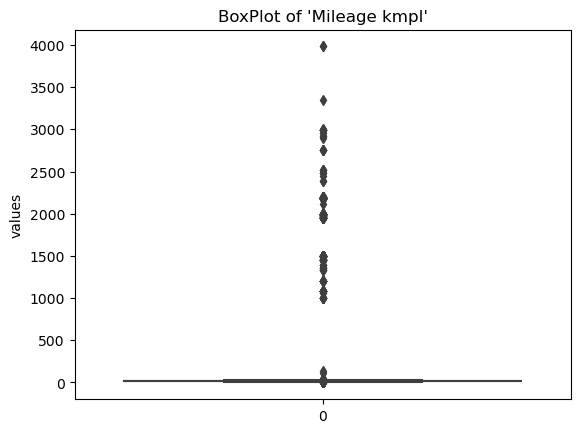

------------------------------------------------------------------------


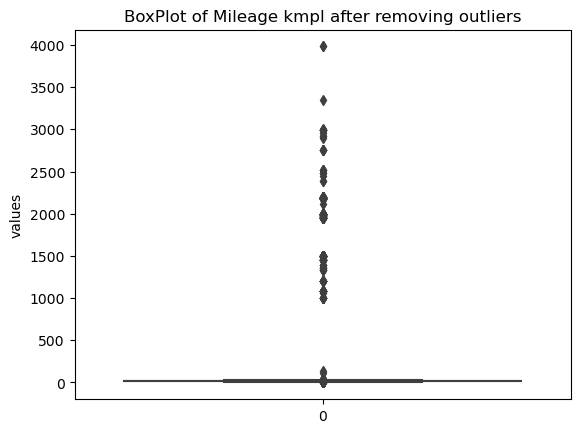

In [23]:
sns.boxplot(data['Mileage kmpl'])
plt.title(f"BoxPlot of 'Mileage kmpl'")
plt.ylabel("values")
plt.show()
print("------------------------------------------------------------------------")
sns.boxplot(Cleaned_data_df['Mileage kmpl'])
plt.title(f"BoxPlot of Mileage kmpl after removing outliers")
plt.ylabel("values")
plt.show()

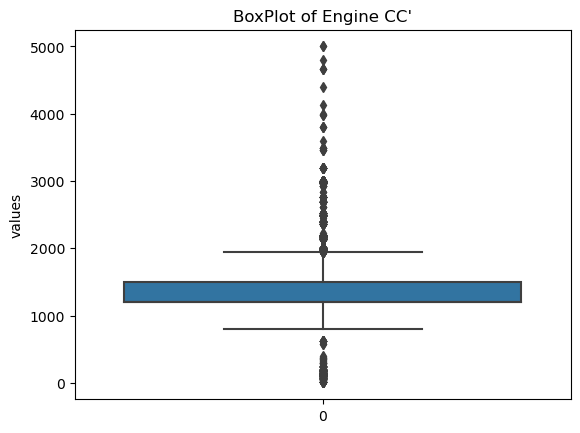

------------------------------------------------------------------------


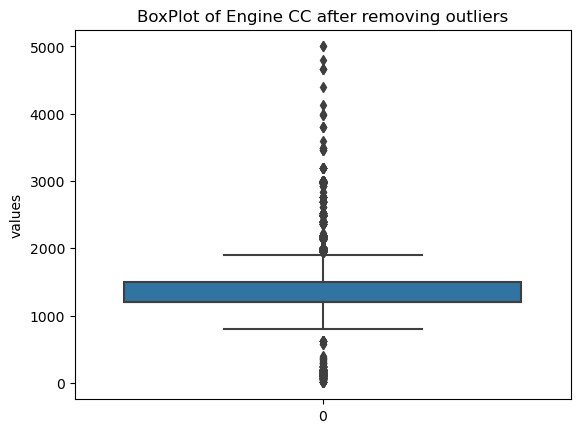

In [24]:
sns.boxplot(data['Engine CC'])
plt.title(f"BoxPlot of Engine CC'")
plt.ylabel("values")
plt.show()
print("------------------------------------------------------------------------")
sns.boxplot(Cleaned_data_df['Engine CC'])
plt.title(f"BoxPlot of Engine CC after removing outliers")
plt.ylabel("values")
plt.show()

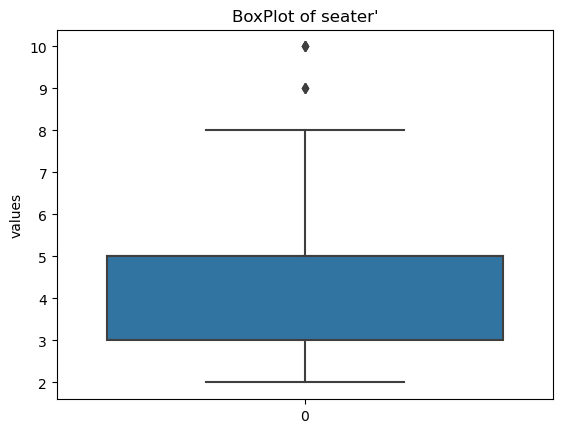

------------------------------------------------------------------------


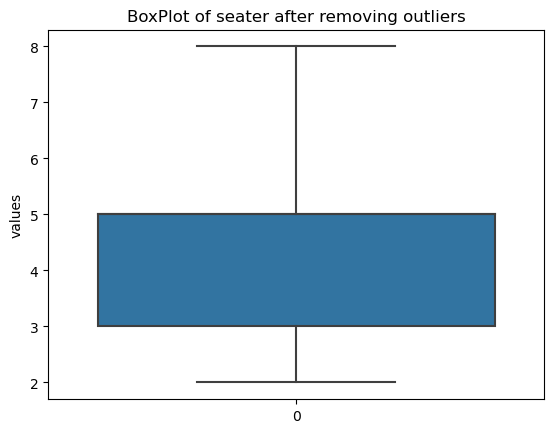

In [25]:
sns.boxplot(data['seater'])
plt.title(f"BoxPlot of seater'")
plt.ylabel("values")
plt.show()
print("------------------------------------------------------------------------")
sns.boxplot(Cleaned_data_df['seater'])
plt.title(f"BoxPlot of seater after removing outliers")
plt.ylabel("values")
plt.show()

In [26]:
data.isnull().sum()

ft              0
km              0
transmission    0
ownerNo         0
oem             0
model           0
modelYear       0
variantName     0
price           0
Mileage kmpl    0
Engine CC       0
seater          0
City            0
dtype: int64

In [27]:
Cleaned_data_df.head()

,ft,km,transmission,ownerNo,oem,model,modelYear,variantName,price,Mileage kmpl,Engine CC,seater,City
0,Petrol,0.021818,Manual,3,Maruti,Maruti Celerio,2015,VXI,40000.0,23.10,998.0,3.0,Bangalore
1,Petrol,0.005947,Manual,2,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,81100.0,17.00,1497.0,5.0,Bangalore
2,Petrol,0.002173,Manual,1,Tata,Tata Tiago,2018,1.2 Revotron XZ,58500.0,23.84,1199.0,5.0,Bangalore
3,Petrol,0.003235,Manual,1,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,46200.0,19.10,1197.0,5.0,Bangalore
4,Diesel,0.010909,Manual,1,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,79000.0,23.65,1248.0,5.0,Bangalore


In [28]:
Cleaned_data_df.dtypes

ft               object
km              float64
transmission     object
ownerNo           int64
oem              object
model            object
modelYear        object
variantName      object
price           float64
Mileage kmpl    float64
Engine CC       float64
seater          float64
City             object
dtype: object

In [29]:
data.shape

(8364, 13)

In [30]:
Cleaned_data_df.shape

(8357, 13)

# Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [32]:
label = LabelEncoder()
onehot = OneHotEncoder()

In [33]:
# Categorical Columns
categorical_columns = Cleaned_data_df.select_dtypes(include=["object"])
categorical_columns = categorical_columns.columns.tolist()
print(categorical_columns)

['ft', 'transmission', 'oem', 'model', 'modelYear', 'variantName', 'City']


In [34]:
#nominal Data
nominal = ['ft','transmission','oem','model','variantName','City']
#Ordinal Data
ordinal = ['modelYear']

## Nominal Data

### Fuel type

In [35]:
fuel_type = onehot.fit_transform(data[['ft']])
fuel_type_df = pd.DataFrame(fuel_type.toarray(),columns=onehot.get_feature_names_out(['ft']))
Cleaned_data_df.drop(columns=['ft'],inplace=True)
Cleaned_data_df = pd.concat([Cleaned_data_df,fuel_type_df],axis=1,join='inner')
Cleaned_data_df.head()

,km,transmission,ownerNo,oem,model,modelYear,variantName,price,Mileage kmpl,Engine CC,seater,City,ft_Cng,ft_Diesel,ft_Electric,ft_Lpg,ft_Petrol
0,0.021818,Manual,3,Maruti,Maruti Celerio,2015,VXI,40000.0,23.10,998.0,3.0,Bangalore,0.0,0.0,0.0,0.0,1.0
1,0.005947,Manual,2,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,81100.0,17.00,1497.0,5.0,Bangalore,0.0,0.0,0.0,0.0,1.0
2,0.002173,Manual,1,Tata,Tata Tiago,2018,1.2 Revotron XZ,58500.0,23.84,1199.0,5.0,Bangalore,0.0,0.0,0.0,0.0,1.0
3,0.003235,Manual,1,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,46200.0,19.10,1197.0,5.0,Bangalore,0.0,0.0,0.0,0.0,1.0
4,0.010909,Manual,1,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,79000.0,23.65,1248.0,5.0,Bangalore,0.0,1.0,0.0,0.0,0.0


### Transmission

In [36]:
fuel_type = onehot.fit_transform(data[['transmission']])
fuel_type_df = pd.DataFrame(fuel_type.toarray(),columns=onehot.get_feature_names_out(['transmission']))
Cleaned_data_df.drop(columns=['transmission'],inplace=True)
Cleaned_data_df = pd.concat([Cleaned_data_df,fuel_type_df],axis=1,join='inner')
Cleaned_data_df.head()

,km,ownerNo,oem,model,modelYear,variantName,price,Mileage kmpl,Engine CC,seater,City,ft_Cng,ft_Diesel,ft_Electric,ft_Lpg,ft_Petrol,transmission_Automatic,transmission_Manual
0,0.021818,3,Maruti,Maruti Celerio,2015,VXI,40000.0,23.10,998.0,3.0,Bangalore,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.005947,2,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,81100.0,17.00,1497.0,5.0,Bangalore,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.002173,1,Tata,Tata Tiago,2018,1.2 Revotron XZ,58500.0,23.84,1199.0,5.0,Bangalore,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.003235,1,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,46200.0,19.10,1197.0,5.0,Bangalore,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.010909,1,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,79000.0,23.65,1248.0,5.0,Bangalore,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### oem

In [37]:
fuel_type = onehot.fit_transform(data[['oem']])
fuel_type_df = pd.DataFrame(fuel_type.toarray(),columns=onehot.get_feature_names_out(['oem']))
Cleaned_data_df.drop(columns=['oem'],inplace=True)
Cleaned_data_df = pd.concat([Cleaned_data_df,fuel_type_df],axis=1,join='inner')
Cleaned_data_df.head()

,km,ownerNo,model,modelYear,variantName,price,Mileage kmpl,Engine CC,seater,City,...,oem_Mitsubishi,oem_Nissan,oem_Opel,oem_Porsche,oem_Renault,oem_Skoda,oem_Tata,oem_Toyota,oem_Volkswagen,oem_Volvo
0,0.021818,3,Maruti Celerio,2015,VXI,40000.0,23.10,998.0,3.0,Bangalore,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.005947,2,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,81100.0,17.00,1497.0,5.0,Bangalore,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.002173,1,Tata Tiago,2018,1.2 Revotron XZ,58500.0,23.84,1199.0,5.0,Bangalore,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.003235,1,Hyundai Xcent,2014,1.2 Kappa S Option,46200.0,19.10,1197.0,5.0,Bangalore,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.010909,1,Maruti SX4 S Cross,2015,DDiS 200 Zeta,79000.0,23.65,1248.0,5.0,Bangalore,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### model

In [38]:
fuel_type = onehot.fit_transform(data[['model']])
fuel_type_df = pd.DataFrame(fuel_type.toarray(),columns=onehot.get_feature_names_out(['model']))
Cleaned_data_df.drop(columns=['model'],inplace=True)
Cleaned_data_df = pd.concat([Cleaned_data_df,fuel_type_df],axis=1,join='inner')
Cleaned_data_df.head()

,km,ownerNo,modelYear,variantName,price,Mileage kmpl,Engine CC,seater,City,ft_Cng,...,model_Volkswagen Vento,model_Volkswagen Virtus,model_Volvo S 80,model_Volvo S60,model_Volvo S60 Cross Country,model_Volvo S90,model_Volvo V40,model_Volvo XC 90,model_Volvo XC40,model_Volvo XC60
0,0.021818,3,2015,VXI,40000.0,23.10,998.0,3.0,Bangalore,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.005947,2,2018,1.5 Petrol Titanium BSIV,81100.0,17.00,1497.0,5.0,Bangalore,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.002173,1,2018,1.2 Revotron XZ,58500.0,23.84,1199.0,5.0,Bangalore,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.003235,1,2014,1.2 Kappa S Option,46200.0,19.10,1197.0,5.0,Bangalore,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.010909,1,2015,DDiS 200 Zeta,79000.0,23.65,1248.0,5.0,Bangalore,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### variantName

In [39]:
Cleaned_data_df.drop(columns=['variantName'],inplace=True)
Cleaned_data_df.head()

,km,ownerNo,modelYear,price,Mileage kmpl,Engine CC,seater,City,ft_Cng,ft_Diesel,...,model_Volkswagen Vento,model_Volkswagen Virtus,model_Volvo S 80,model_Volvo S60,model_Volvo S60 Cross Country,model_Volvo S90,model_Volvo V40,model_Volvo XC 90,model_Volvo XC40,model_Volvo XC60
0,0.021818,3,2015,40000.0,23.10,998.0,3.0,Bangalore,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.005947,2,2018,81100.0,17.00,1497.0,5.0,Bangalore,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.002173,1,2018,58500.0,23.84,1199.0,5.0,Bangalore,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.003235,1,2014,46200.0,19.10,1197.0,5.0,Bangalore,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.010909,1,2015,79000.0,23.65,1248.0,5.0,Bangalore,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### City

In [40]:
fuel_type = onehot.fit_transform(data[['City']])
fuel_type_df = pd.DataFrame(fuel_type.toarray(),columns=onehot.get_feature_names_out(['City']))
Cleaned_data_df.drop(columns=['City'],inplace=True)
Cleaned_data_df = pd.concat([Cleaned_data_df,fuel_type_df],axis=1,join='inner')
Cleaned_data_df.head()

,km,ownerNo,modelYear,price,Mileage kmpl,Engine CC,seater,ft_Cng,ft_Diesel,ft_Electric,...,model_Volvo V40,model_Volvo XC 90,model_Volvo XC40,model_Volvo XC60,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
0,0.021818,3,2015,40000.0,23.10,998.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.005947,2,2018,81100.0,17.00,1497.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.002173,1,2018,58500.0,23.84,1199.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.003235,1,2014,46200.0,19.10,1197.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.010909,1,2015,79000.0,23.65,1248.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Ordinal Data

In [41]:
Cleaned_data_df['modelYear'] = label.fit_transform(Cleaned_data_df['modelYear'])

In [42]:
Cleaned_data_df.head()

,km,ownerNo,modelYear,price,Mileage kmpl,Engine CC,seater,ft_Cng,ft_Diesel,ft_Electric,...,model_Volvo V40,model_Volvo XC 90,model_Volvo XC40,model_Volvo XC60,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
0,0.021818,3,20,40000.0,23.10,998.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.005947,2,23,81100.0,17.00,1497.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.002173,1,23,58500.0,23.84,1199.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.003235,1,19,46200.0,19.10,1197.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.010909,1,20,79000.0,23.65,1248.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Checking for null values

In [43]:
Cleaned_data_df[Cleaned_data_df.isnull().any(axis=1)]

,km,ownerNo,modelYear,price,Mileage kmpl,Engine CC,seater,ft_Cng,ft_Diesel,ft_Electric,...,model_Volvo V40,model_Volvo XC 90,model_Volvo XC40,model_Volvo XC60,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata


# Spliting the data into dependented and independent varaible

In [44]:
y = Cleaned_data_df['price']
y.head()

0    40000.0
1    81100.0
2    58500.0
3    46200.0
4    79000.0
Name: price, dtype: float64

In [45]:
X = Cleaned_data_df.drop(columns=['price'],axis=1)
X.head()

,km,ownerNo,modelYear,Mileage kmpl,Engine CC,seater,ft_Cng,ft_Diesel,ft_Electric,ft_Lpg,...,model_Volvo V40,model_Volvo XC 90,model_Volvo XC40,model_Volvo XC60,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
0,0.021818,3,20,23.10,998.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.005947,2,23,17.00,1497.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.002173,1,23,23.84,1199.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.003235,1,19,19.10,1197.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.010909,1,20,23.65,1248.0,5.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Scaling the data

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
standard = StandardScaler()

Scaling the independent variable

In [48]:
X_scaled = standard.fit_transform(X)

In [49]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)

In [50]:
X_scaled_df.head()

,km,ownerNo,modelYear,Mileage kmpl,Engine CC,seater,ft_Cng,ft_Diesel,ft_Electric,ft_Lpg,...,model_Volvo V40,model_Volvo XC 90,model_Volvo XC40,model_Volvo XC60,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
0,0.824449,2.556978,-0.387897,-0.158017,-0.733945,-1.134062,-0.10893,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,2.156488,-0.451861,-0.464669,-0.464288,-0.392787,-0.444353
1,-0.353971,0.997790,0.381848,-0.177240,0.236802,0.546469,-0.10893,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,2.156488,-0.451861,-0.464669,-0.464288,-0.392787,-0.444353
2,-0.634179,-0.561397,0.381848,-0.155685,-0.342923,0.546469,-0.10893,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,2.156488,-0.451861,-0.464669,-0.464288,-0.392787,-0.444353
3,-0.555274,-0.561397,-0.644479,-0.170622,-0.346813,0.546469,-0.10893,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,2.156488,-0.451861,-0.464669,-0.464288,-0.392787,-0.444353
4,0.014483,-0.561397,-0.387897,-0.156283,-0.247599,0.546469,-0.10893,1.461450,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,2.156488,-0.451861,-0.464669,-0.464288,-0.392787,-0.444353


# Train and test split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled_df,y,test_size=0.20,random_state=42)

In [53]:
X_train.head()

,km,ownerNo,modelYear,Mileage kmpl,Engine CC,seater,ft_Cng,ft_Diesel,ft_Electric,ft_Lpg,...,model_Volvo V40,model_Volvo XC 90,model_Volvo XC40,model_Volvo XC60,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
734,-0.525495,0.997790,0.895012,-0.172198,-0.346813,0.546469,-0.10893,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,2.156488,-0.451861,-0.464669,-0.464288,-0.392787,-0.444353
196,-0.120512,-0.561397,-1.927388,-0.180392,-0.014152,0.546469,-0.10893,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,2.156488,-0.451861,-0.464669,-0.464288,-0.392787,-0.444353
5744,0.151434,-0.561397,-0.644479,-0.161326,-1.126913,-1.134062,-0.10893,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,-0.463717,-0.451861,-0.464669,2.153834,-0.392787,-0.444353
3881,0.419466,0.997790,-0.644479,-0.158080,0.166768,-1.134062,-0.10893,1.461450,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,-0.463717,-0.451861,2.152069,-0.464288,-0.392787,-0.444353
1174,0.149477,-0.561397,0.381848,-0.164635,1.153079,0.546469,-0.10893,1.461450,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,2.156488,-0.451861,-0.464669,-0.464288,-0.392787,-0.444353


In [54]:
y_train.head()

734      70000.0
196      37500.0
5746     25500.0
3883     20000.0
1174    160000.0
Name: price, dtype: float64

In [55]:
X_test

,km,ownerNo,modelYear,Mileage kmpl,Engine CC,seater,ft_Cng,ft_Diesel,ft_Electric,ft_Lpg,...,model_Volvo V40,model_Volvo XC 90,model_Volvo XC40,model_Volvo XC60,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
5748,0.192999,0.997790,0.381848,-0.163374,-0.346813,0.546469,-0.108930,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,-0.463717,-0.451861,-0.464669,2.153834,-0.392787,-0.444353
8156,-0.375651,-0.561397,0.895012,-0.230814,-2.428377,-1.134062,-0.108930,-0.684252,17.564695,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,-0.463717,-0.451861,-0.464669,-0.464288,-0.392787,2.250464
6987,-0.241939,0.997790,-1.414224,-0.175664,-0.150329,0.546469,-0.108930,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,-0.463717,-0.451861,-0.464669,-0.464288,-0.392787,2.250464
5008,-0.053568,-0.561397,-0.901060,-0.171253,-0.733945,0.546469,-0.108930,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,-0.463717,-0.451861,-0.464669,2.153834,-0.392787,-0.444353
5382,0.076364,-0.561397,0.895012,-0.128331,-0.733945,-1.134062,9.180169,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,-0.463717,-0.451861,-0.464669,2.153834,-0.392787,-0.444353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,0.824449,-0.561397,-0.387897,-0.191264,3.125701,2.227001,-0.108930,1.461450,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,2.156488,-0.451861,-0.464669,-0.464288,-0.392787,-0.444353
1718,-0.228507,-0.561397,0.381848,-0.176957,3.147100,-0.293796,-0.108930,1.461450,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,-0.463717,2.213068,-0.464669,-0.464288,-0.392787,-0.444353
4731,1.256431,-0.561397,-2.183969,-0.190476,2.176352,3.067266,-0.108930,1.461450,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,-0.463717,-0.451861,-0.464669,2.153834,-0.392787,-0.444353
798,0.689454,4.116165,-2.183969,-0.174089,-0.739781,0.546469,-0.108930,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,2.156488,-0.451861,-0.464669,-0.464288,-0.392787,-0.444353


In [56]:
y_test

5750     72900.0
8163    127500.0
6991     22100.0
5010     31100.0
5384     54900.0
          ...   
747     206000.0
1718    520000.0
4733     65000.0
798      11000.0
88      289000.0
Name: price, Length: 1672, dtype: float64

# Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
Linear_model =  LinearRegression()

In [59]:
Linear_model.fit(X_train,y_train)

LinearRegression()

In [60]:
y_pred = Linear_model.predict(X_test)
y_pred

array([ 6.99580e+04,  1.04794e+05, -1.02000e+02, ...,  5.06780e+04,
        3.85180e+04,  3.53046e+05])

In [61]:
y_test

5750     72900.0
8163    127500.0
6991     22100.0
5010     31100.0
5384     54900.0
          ...   
747     206000.0
1718    520000.0
4733     65000.0
798      11000.0
88      289000.0
Name: price, Length: 1672, dtype: float64

In [62]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [63]:
linear_mae = mean_absolute_error(y_test,y_pred)
print(f"linear mae: {linear_mae:2f}")
linear_mse = mean_squared_error(y_test,y_pred)
print(f"linear mse: {linear_mse:2f}")
linear_rmse = np.sqrt(linear_mse)
print(f"linear  rmse: {linear_rmse:2f}")
linear_r2score = r2_score(y_test,y_pred)
print(f"linear r2 score: {linear_r2score}")

linear mae: 55050992316170024.000000
linear mse: 534296238844801361426661943363502080.000000
linear  rmse: 730955702382026240.000000
linear r2 score: -4.45295851634366e+25


## Lasso regression

In [64]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=10)
lasso_model.fit(X_train, y_train)

/Users/harshitsatish/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.005e+10, tolerance: 7.370e+09
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=10)

In [65]:
lasso_y_pred = lasso_model.predict(X_test)
lasso_y_pred

array([7.12310269e+04, 1.15315874e+05, 1.49180414e+02, ...,
       5.73896091e+04, 3.71962019e+04, 3.40575530e+05])

In [66]:
y_test

5750     72900.0
8163    127500.0
6991     22100.0
5010     31100.0
5384     54900.0
          ...   
747     206000.0
1718    520000.0
4733     65000.0
798      11000.0
88      289000.0
Name: price, Length: 1672, dtype: float64

In [67]:
lasso_mae = mean_absolute_error(y_test,lasso_y_pred)
print(f"lasso mae: {lasso_mae:2f}")
lasso_mse = mean_squared_error(y_test,lasso_y_pred)
print(f"lasso mse: {lasso_mse:2f}")
lasso_rmse = np.sqrt(lasso_mse)
print(f"lasso  rmse: {lasso_rmse:2f}")
lasso_r2score = r2_score(y_test,lasso_y_pred)
print(f"lasso r2 score: {lasso_r2score:2f}")

lasso mae: 22820.214438
lasso mse: 2478255157.353240
lasso  rmse: 49782.076668
lasso r2 score: 0.793456


In [68]:
lasso_coeff = pd.Series(lasso_model.coef_, index= X.columns)

In [69]:
zero_coeff_value = lasso_coeff[lasso_coeff ==0].index
print("feature to be deleted: ", zero_coeff_value)

feature to be deleted:  Index(['ft_Petrol', 'oem_Chevrolet', 'oem_Citroen', 'oem_Kia', 'oem_Mahindra',
       'oem_Volkswagen', 'model_Ambassador', 'model_BMW 2 Series',
       'model_Datsun GO Plus', 'model_Fiat Grande Punto', 'model_Isuzu MU 7',
       'model_Jeep Compass', 'model_Jeep Compass Trailhawk', 'model_Lexus ES',
       'model_MG Comet EV', 'model_MG Hector',
       'model_Mahindra Bolero Pik Up Extra Long',
       'model_Mahindra Bolero Power Plus', 'model_Mahindra Scorpio Classic',
       'model_Mahindra TUV 300 Plus', 'model_Maruti Swift Dzire',
       'model_Mercedes-Benz GLC Coupe', 'model_Mini 3 DOOR',
       'model_Mini 5 DOOR', 'model_Mini Cooper', 'model_Mini Cooper Clubman',
       'model_Mini Cooper Convertible', 'model_Mitsubishi Outlander',
       'model_Nissan Sunny', 'model_Porsche 911', 'model_Porsche Panamera',
       'model_Tata Indigo', 'model_Tata Nexon EV', 'model_Tata Sumo Victa',
       'model_Toyota Etios Cross', 'model_Toyota Hyryder',
       'model

# Dropping columns which has co_efficient zero

In [70]:
Cleaned_data_df.shape

(8357, 368)

In [71]:
Cleaned_data_df.drop(columns=['oem_Chevrolet', 'oem_Citroen', 'oem_Kia', 'oem_Mahindra','oem_Volkswagen'],inplace=True)

In [72]:
Cleaned_data_df.drop(columns=['model_Ambassador', 'model_BMW 2 Series','model_Datsun GO Plus', 'model_Fiat Grande Punto', 'model_Isuzu MU 7','model_Jeep Compass', 'model_Jeep Compass Trailhawk', 'model_Lexus ES','model_MG Comet EV', 'model_MG Hector','model_Mahindra Bolero Pik Up Extra Long','model_Mahindra Bolero Power Plus', 'model_Mahindra Scorpio Classic','model_Mahindra TUV 300 Plus', 'model_Maruti Swift Dzire','model_Mercedes-Benz GLC Coupe', 'model_Mini 3 DOOR','model_Mini 5 DOOR', 'model_Mini Cooper', 'model_Mini Cooper Clubman','model_Mini Cooper Convertible', 'model_Mitsubishi Outlander','model_Nissan Sunny', 'model_Porsche 911', 'model_Porsche Panamera','model_Tata Indigo', 'model_Tata Nexon EV', 'model_Tata Sumo Victa','model_Toyota Etios Cross', 'model_Toyota Hyryder','model_Volkswagen CrossPolo', 'model_Volvo S90'],inplace=True)

In [73]:
Cleaned_data_df.shape

(8357, 331)

# spliting the data into dependent and independent varaible

In [74]:
y = Cleaned_data_df['price']

In [75]:
y.head()

0    40000.0
1    81100.0
2    58500.0
3    46200.0
4    79000.0
Name: price, dtype: float64

In [76]:
X = Cleaned_data_df.drop(columns=['price'],axis=1)
X.head()

,km,ownerNo,modelYear,Mileage kmpl,Engine CC,seater,ft_Cng,ft_Diesel,ft_Electric,ft_Lpg,...,model_Volvo V40,model_Volvo XC 90,model_Volvo XC40,model_Volvo XC60,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
0,0.021818,3,20,23.10,998.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.005947,2,23,17.00,1497.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.002173,1,23,23.84,1199.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.003235,1,19,19.10,1197.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.010909,1,20,23.65,1248.0,5.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Scaling the data

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
sc = StandardScaler()

In [79]:
X_scaled = sc.fit_transform(X)

In [80]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled_df.head()

,km,ownerNo,modelYear,Mileage kmpl,Engine CC,seater,ft_Cng,ft_Diesel,ft_Electric,ft_Lpg,...,model_Volvo V40,model_Volvo XC 90,model_Volvo XC40,model_Volvo XC60,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
0,0.824449,2.556978,-0.387897,-0.158017,-0.733945,-1.134062,-0.10893,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,2.156488,-0.451861,-0.464669,-0.464288,-0.392787,-0.444353
1,-0.353971,0.997790,0.381848,-0.177240,0.236802,0.546469,-0.10893,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,2.156488,-0.451861,-0.464669,-0.464288,-0.392787,-0.444353
2,-0.634179,-0.561397,0.381848,-0.155685,-0.342923,0.546469,-0.10893,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,2.156488,-0.451861,-0.464669,-0.464288,-0.392787,-0.444353
3,-0.555274,-0.561397,-0.644479,-0.170622,-0.346813,0.546469,-0.10893,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,2.156488,-0.451861,-0.464669,-0.464288,-0.392787,-0.444353
4,0.014483,-0.561397,-0.387897,-0.156283,-0.247599,0.546469,-0.10893,1.461450,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,2.156488,-0.451861,-0.464669,-0.464288,-0.392787,-0.444353


# Train test split

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled_df,y,test_size=0.20,random_state=42)

In [82]:
X_train

,km,ownerNo,modelYear,Mileage kmpl,Engine CC,seater,ft_Cng,ft_Diesel,ft_Electric,ft_Lpg,...,model_Volvo V40,model_Volvo XC 90,model_Volvo XC40,model_Volvo XC60,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
734,-0.525495,0.997790,0.895012,-0.172198,-0.346813,0.546469,-0.10893,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,2.156488,-0.451861,-0.464669,-0.464288,-0.392787,-0.444353
196,-0.120512,-0.561397,-1.927388,-0.180392,-0.014152,0.546469,-0.10893,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,2.156488,-0.451861,-0.464669,-0.464288,-0.392787,-0.444353
5744,0.151434,-0.561397,-0.644479,-0.161326,-1.126913,-1.134062,-0.10893,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,-0.463717,-0.451861,-0.464669,2.153834,-0.392787,-0.444353
3881,0.419466,0.997790,-0.644479,-0.158080,0.166768,-1.134062,-0.10893,1.461450,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,-0.463717,-0.451861,2.152069,-0.464288,-0.392787,-0.444353
1174,0.149477,-0.561397,0.381848,-0.164635,1.153079,0.546469,-0.10893,1.461450,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,2.156488,-0.451861,-0.464669,-0.464288,-0.392787,-0.444353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.824449,0.997790,-1.670806,-0.178910,-0.344868,0.546469,-0.10893,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,-0.463717,-0.451861,-0.464669,2.153834,-0.392787,-0.444353
5191,-0.525495,-0.561397,1.408176,-0.160380,-0.346813,0.546469,-0.10893,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,-0.463717,-0.451861,-0.464669,2.153834,-0.392787,-0.444353
5390,-0.053014,-0.561397,-0.131315,-0.168385,-0.562751,-1.134062,-0.10893,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,-0.463717,-0.451861,-0.464669,2.153834,-0.392787,-0.444353
860,0.416779,-0.561397,-0.131315,-0.165485,-0.004426,0.546469,-0.10893,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,2.156488,-0.451861,-0.464669,-0.464288,-0.392787,-0.444353


In [83]:
y_train

734      70000.0
196      37500.0
5746     25500.0
3883     20000.0
1174    160000.0
          ...   
5736     25000.0
5193    100000.0
5392     29000.0
860      67400.0
7276     16500.0
Name: price, Length: 6685, dtype: float64

In [84]:
X_test

,km,ownerNo,modelYear,Mileage kmpl,Engine CC,seater,ft_Cng,ft_Diesel,ft_Electric,ft_Lpg,...,model_Volvo V40,model_Volvo XC 90,model_Volvo XC40,model_Volvo XC60,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
5748,0.192999,0.997790,0.381848,-0.163374,-0.346813,0.546469,-0.108930,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,-0.463717,-0.451861,-0.464669,2.153834,-0.392787,-0.444353
8156,-0.375651,-0.561397,0.895012,-0.230814,-2.428377,-1.134062,-0.108930,-0.684252,17.564695,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,-0.463717,-0.451861,-0.464669,-0.464288,-0.392787,2.250464
6987,-0.241939,0.997790,-1.414224,-0.175664,-0.150329,0.546469,-0.108930,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,-0.463717,-0.451861,-0.464669,-0.464288,-0.392787,2.250464
5008,-0.053568,-0.561397,-0.901060,-0.171253,-0.733945,0.546469,-0.108930,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,-0.463717,-0.451861,-0.464669,2.153834,-0.392787,-0.444353
5382,0.076364,-0.561397,0.895012,-0.128331,-0.733945,-1.134062,9.180169,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,-0.463717,-0.451861,-0.464669,2.153834,-0.392787,-0.444353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,0.824449,-0.561397,-0.387897,-0.191264,3.125701,2.227001,-0.108930,1.461450,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,2.156488,-0.451861,-0.464669,-0.464288,-0.392787,-0.444353
1718,-0.228507,-0.561397,0.381848,-0.176957,3.147100,-0.293796,-0.108930,1.461450,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,-0.463717,2.213068,-0.464669,-0.464288,-0.392787,-0.444353
4731,1.256431,-0.561397,-2.183969,-0.190476,2.176352,3.067266,-0.108930,1.461450,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,-0.463717,-0.451861,-0.464669,2.153834,-0.392787,-0.444353
798,0.689454,4.116165,-2.183969,-0.174089,-0.739781,0.546469,-0.108930,-0.684252,-0.056932,-0.043798,...,-0.015472,-0.024468,-0.032834,-0.036304,2.156488,-0.451861,-0.464669,-0.464288,-0.392787,-0.444353


In [85]:
y_test

5750     72900.0
8163    127500.0
6991     22100.0
5010     31100.0
5384     54900.0
          ...   
747     206000.0
1718    520000.0
4733     65000.0
798      11000.0
88      289000.0
Name: price, Length: 1672, dtype: float64

# Linear Regression

In [86]:
linear_model = LinearRegression()

linear_model.fit(X_train,y_train)

LinearRegression()

In [87]:
y_pred = linear_model.predict(X_test)
y_pred

array([ 7.17403750e+04,  1.07648438e+05, -2.23562500e+02, ...,
        6.30363750e+04,  3.33563750e+04,  3.33100375e+05])

In [88]:
y_test

5750     72900.0
8163    127500.0
6991     22100.0
5010     31100.0
5384     54900.0
          ...   
747     206000.0
1718    520000.0
4733     65000.0
798      11000.0
88      289000.0
Name: price, Length: 1672, dtype: float64

In [89]:
linear_mae = mean_absolute_error(y_test,y_pred)
print(f"linear mae: {linear_mae:2f}")
linear_mse = mean_squared_error(y_test,y_pred)
print(f"linear mse: {linear_mse:2f}")
linear_rmse = np.sqrt(linear_mse)
print(f"linear  rmse: {linear_rmse:2f}")
linear_r2score = r2_score(y_test,y_pred)
print(f"linear r2 score: {linear_r2score:2f}")

linear mae: 6065424273842164.000000
linear mse: 10593141950868566986031597803798528.000000
linear  rmse: 102922990390235776.000000
linear r2 score: -882858950438154426908672.000000


## Lasso regression

In [90]:
lasso_model = Lasso(alpha=10)
lasso_model.fit(X_train, y_train)

/Users/harshitsatish/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.278e+11, tolerance: 7.370e+09
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=10)

In [91]:
lasso_y_pred = lasso_model.predict(X_test)
lasso_y_pred

array([7.12217971e+04, 1.15312503e+05, 1.65270660e+02, ...,
       5.73793063e+04, 3.71948893e+04, 3.40570705e+05])

In [92]:
lasso_mae = mean_absolute_error(y_test,lasso_y_pred)
print(f"lasso mae: {lasso_mae:2f}")
lasso_mse = mean_squared_error(y_test,lasso_y_pred)
print(f"lasso mse: {lasso_mse:2f}")
lasso_rmse = np.sqrt(lasso_mse)
print(f"lasso  rmse: {lasso_rmse:2f}")
lasso_r2score = r2_score(y_test,lasso_y_pred)
print(f"lasso r2 score: {lasso_r2score:2f}")

lasso mae: 22816.427066
lasso mse: 2477769421.278482
lasso  rmse: 49777.197805
lasso r2 score: 0.793496


## Ridge

In [93]:
from sklearn.linear_model import Ridge

In [94]:
Ridge_model = Ridge(alpha=10)

Ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [95]:
ridge_y_pred = Ridge_model.predict(X_test)
ridge_y_pred

array([7.12402902e+04, 1.15655160e+05, 2.77322265e+02, ...,
       5.75683680e+04, 3.75014569e+04, 3.40605323e+05])

In [96]:
y_test

5750     72900.0
8163    127500.0
6991     22100.0
5010     31100.0
5384     54900.0
          ...   
747     206000.0
1718    520000.0
4733     65000.0
798      11000.0
88      289000.0
Name: price, Length: 1672, dtype: float64

In [97]:
Ridge_mae = mean_absolute_error(y_test,ridge_y_pred)
print(f"Ridge mae: {Ridge_mae:2f}")
Ridge_mse = mean_squared_error(y_test,ridge_y_pred)
print(f"Ridge mse: {Ridge_mse:2f}")
Ridge_rmse = np.sqrt(Ridge_mse)
print(f"Ridge  rmse: {Ridge_rmse:2f}")
Ridge_r2score = r2_score(y_test,ridge_y_pred)
print(f"Ridge r2 score: {Ridge_r2score:2f}")

Ridge mae: 22967.218936
Ridge mse: 2554498509.529005
Ridge  rmse: 50542.046946
Ridge r2 score: 0.787102


# Graphical Representation

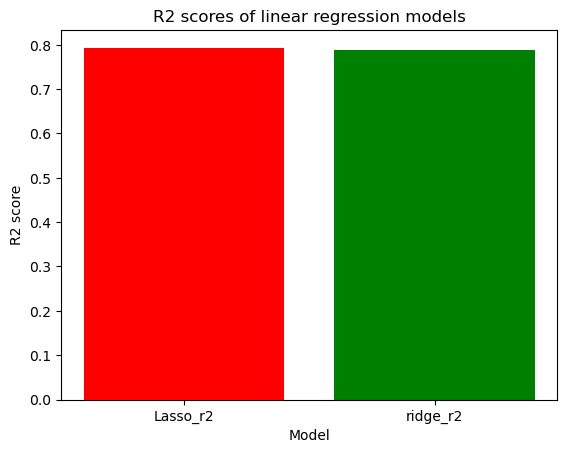

In [98]:
r2 = ['Lasso_r2','ridge_r2']
r2_values =[lasso_r2score,Ridge_r2score]
plt.bar(r2,r2_values, color =['red','green','yellow'])
plt.title("R2 scores of linear regression models")
plt.xlabel("Model")
plt.ylabel("R2 score")
plt.show()

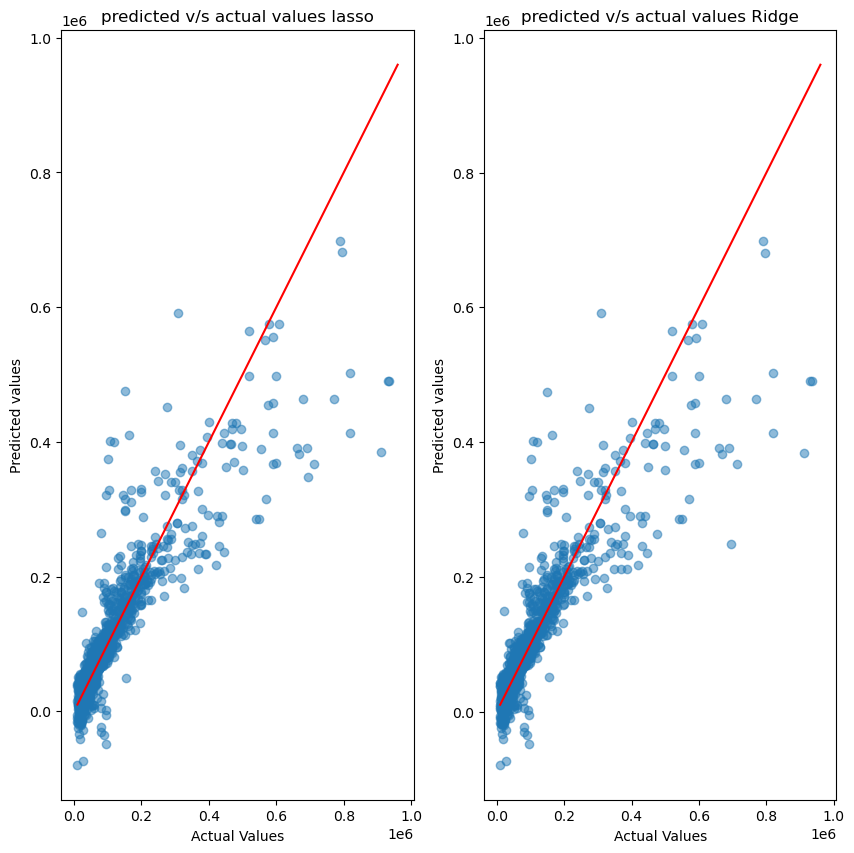

In [99]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.scatter(y_test,lasso_y_pred,alpha=0.5)
plt.plot([y.min(),y.max()],[y.min(),y.max()],color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("predicted v/s actual values lasso")
plt.subplot(1,2,2)
plt.scatter(y_test,ridge_y_pred,alpha=0.5)
plt.plot([y.min(),y.max()],[y.min(),y.max()],color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("predicted v/s actual values Ridge")
plt.show()

# KNN Algorithm

## Scaling

In [100]:
from sklearn.preprocessing import MinMaxScaler

In [101]:
minmax = MinMaxScaler()

In [102]:
X_scaled = minmax.fit_transform(X)

In [103]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled_df.head()

,km,ownerNo,modelYear,Mileage kmpl,Engine CC,seater,ft_Cng,ft_Diesel,ft_Electric,ft_Lpg,...,model_Volvo V40,model_Volvo XC 90,model_Volvo XC40,model_Volvo XC60,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
0,0.021818,0.6,0.714286,0.005801,0.198799,0.166667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.005947,0.4,0.821429,0.004269,0.298699,0.500000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.002173,0.2,0.821429,0.005987,0.239039,0.500000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.003235,0.2,0.678571,0.004797,0.238639,0.500000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.010909,0.2,0.714286,0.005939,0.248849,0.500000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Train and test split

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled_df,y,test_size=0.20,random_state=42)

In [105]:
X_train.head()

,km,ownerNo,modelYear,Mileage kmpl,Engine CC,seater,ft_Cng,ft_Diesel,ft_Electric,ft_Lpg,...,model_Volvo V40,model_Volvo XC 90,model_Volvo XC40,model_Volvo XC60,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
734,0.003636,0.4,0.892857,0.004671,0.238639,0.500000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
196,0.009091,0.2,0.500000,0.004018,0.272873,0.500000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5744,0.012754,0.2,0.678571,0.005537,0.158358,0.166667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3881,0.016364,0.4,0.678571,0.005796,0.291491,0.166667,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1174,0.012727,0.2,0.821429,0.005274,0.392993,0.500000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [106]:
y_train.head()

734      70000.0
196      37500.0
5746     25500.0
3883     20000.0
1174    160000.0
Name: price, dtype: float64

In [107]:
X_test.head()

,km,ownerNo,modelYear,Mileage kmpl,Engine CC,seater,ft_Cng,ft_Diesel,ft_Electric,ft_Lpg,...,model_Volvo V40,model_Volvo XC 90,model_Volvo XC40,model_Volvo XC60,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
5748,0.013313,0.4,0.821429,0.005374,0.238639,0.500000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8156,0.005655,0.2,0.892857,0.000000,0.024424,0.166667,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6987,0.007455,0.4,0.571429,0.004395,0.258859,0.500000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5008,0.009993,0.2,0.642857,0.004746,0.198799,0.500000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5382,0.011743,0.2,0.892857,0.008167,0.198799,0.166667,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [108]:
y_test.head()

5750     72900.0
8163    127500.0
6991     22100.0
5010     31100.0
5384     54900.0
Name: price, dtype: float64

## model

In [109]:
from sklearn.neighbors  import KNeighborsRegressor

In [110]:
KNN = KNeighborsRegressor(n_neighbors=6)

In [111]:
KNN.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=6)

In [112]:
KNN_y_pred = KNN.predict(X_test)
y_pred

array([ 7.17403750e+04,  1.07648438e+05, -2.23562500e+02, ...,
        6.30363750e+04,  3.33563750e+04,  3.33100375e+05])

In [113]:
y_test

5750     72900.0
8163    127500.0
6991     22100.0
5010     31100.0
5384     54900.0
          ...   
747     206000.0
1718    520000.0
4733     65000.0
798      11000.0
88      289000.0
Name: price, Length: 1672, dtype: float64

In [114]:
KNN_mae = mean_absolute_error(y_test,KNN_y_pred)
print(f"KNN mae: {KNN_mae:2f}")
KNN_mse = mean_squared_error(y_test,KNN_y_pred)
print(f"KNN mse: {KNN_mse:2f}")
KNN_rmse = np.sqrt(KNN_mse)
print(f"KNN  rmse: {KNN_rmse:2f}")
KNN_r2score = r2_score(y_test,KNN_y_pred)
print(f"KNN r2 score: {Ridge_r2score:2f}")

KNN mae: 22094.079844
KNN mse: 2855432273.213866
KNN  rmse: 53436.244939
KNN r2 score: 0.787102


# random forest 

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
radomforest_model = RandomForestRegressor(n_estimators=300)

In [117]:
radomforest_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=300)

In [118]:
randomforest_y_pred = radomforest_model.predict(X_test)
randomforest_y_pred

array([ 65765.46825397, 127425.        ,  23918.94047619, ...,
        39096.4       ,  60104.66      , 291413.66666667])

In [119]:
y_test

5750     72900.0
8163    127500.0
6991     22100.0
5010     31100.0
5384     54900.0
          ...   
747     206000.0
1718    520000.0
4733     65000.0
798      11000.0
88      289000.0
Name: price, Length: 1672, dtype: float64

In [120]:
r_mae = mean_absolute_error(y_test,randomforest_y_pred)
print(f"r mae: {r_mae:2f}")
r_mse = mean_squared_error(y_test,randomforest_y_pred)
print(f"r mse: {r_mse:2f}")
r_rmse = np.sqrt(r_mse)
print(f"r rmse: {r_rmse:2f}")
r_r2score = r2_score(y_test,randomforest_y_pred)
print(f"r r2 score: {r_r2score:2f}")

r mae: 13409.164476
r mse: 961835151.076419
r rmse: 31013.467253
r r2 score: 0.919838


# Model Selection

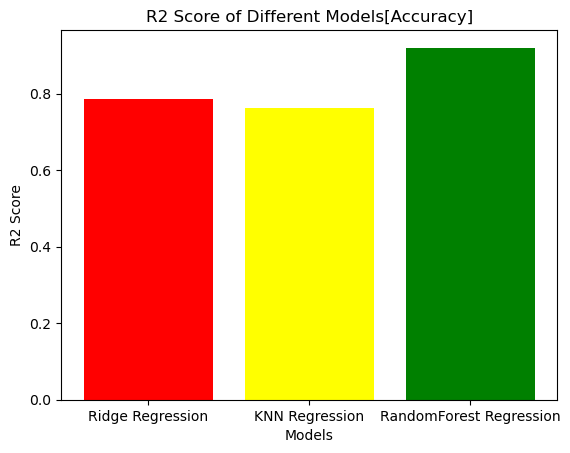

In [121]:
r2 = [Ridge_r2score,KNN_r2score,r_r2score]
mark = ['Ridge Regression','KNN Regression','RandomForest Regression']
plt.bar(mark,r2, color=['red','yellow','green'])
plt.xlabel("Models")
plt.ylabel("R2 Score")
plt.title("R2 Score of Different Models[Accuracy]")
plt.show()

Based On the R2 score obtained, We are choosing  the best model as the one with the highest R2 score. In this case, the best model is random forest regressor

# Cross Validation

In [122]:
from sklearn.model_selection import RandomizedSearchCV

In [123]:
# defining the parameters for the randomforest
n_estimators = [int(x) for x in np.linspace(start = 100, stop=1200,num=12)] # number of trees
max_features = ['auto','sqrt'] # number feature for every split
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [124]:
# creating a random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features' : max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [125]:
random_search = RandomizedSearchCV(radomforest_model, random_grid, cv=5, n_iter=10)

In [126]:
random_forest_cv = RandomizedSearchCV(estimator = radomforest_model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [127]:
random_forest_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/Users/harshitsatish/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/harshitsatish/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/harshitsatish/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/harshitsatish/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parame

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=300),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [128]:
random_forest_cv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [129]:
prediction=random_forest_cv.predict(X_test)

In [130]:
#accuracy
accuracy = r2_score(y_test,prediction)
accuracy

0.8474923004742958

# Saving Model

In [131]:
import pickle

In [132]:
with open("Random_Forest_Regressor.pkl","wb") as file:
    pickle.dump(radomforest_model,file)